In [1]:
#問題1 仮定関数

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 問題1-5

In [21]:


class ScratchLinearRegression:
    
    def __init__(self,num_iter,lr,bias,verbose,var=1):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.cost = np.zeros(self.iter+1)
        self.val_cost = np.zeros(self.iter+1)
        self.var=var
        
        
    def fit(self,X,y,X_val=None, y_val=None):
        self.thita_list = np.zeros((self.iter+1,X.shape[1]+1))
        self._linear_hypothesis(X)
        init_error = self.calc_error(X,y)
        self.cost[0] = np.sum(init_error**2) /(2 * X.shape[0])
        if X_val is not None:
            init_val_error= self.calc_error(X_val,y_val)
            self.val_cost[0] = np.sum(init_val_error**2)/(2 * X_val.shape[0])
        
        
        for n in range(self.iter):
            error = self.calc_error(X,y)
            cost = self._gradient_descent(X,error)
#             print('thita',self.thita)
            self.thita_list[n+1] = self.thita
            self.cost[n+1] = cost
            
            if X_val is not None:
                val_error = self.calc_error(X_val,y_val)
                val_cost = np.sum(val_error**2) /(2*X_val.shape[0])
                self.val_cost[n+1]=val_cost
            
        
        
    def predict(self,X):
        #print('thita',self.thita)
        if self.bias == True:
            ret_val = np.dot(X,self.thita[:-1]) + self.thita[-1]
        else:
            ret_val = np.dot(X,self.thita)
        
        return ret_val
    
    def _linear_hypothesis(self,X):
        if self.bias:
            #print(X.shape)
            self.thita = np.random.randn(X.shape[1]+1)*self.var
            #value =  np.dot(X,self.thita[:-1]) + self.thita[-1]
#             print(self.thita_list[0].shape,self.thita.shape)
            self.thita_list[0] =self.thita
        else:
            self.thita = np.random.randn(X.shape[1])
        #return value#(n,1)
            
    def _gradient_descent(self, X,error):
        #X(n,d)
        #error(n)
        #print(X.shape[0],'x')
        #print(error.shape)
        cost = np.sum(error**2) /(2 * X.shape[0])
#         print(cost)
        loss = np.dot(error.T,X)/X.shape[0]#(1,N)(N,D)=D
        if self.bias:
            self.thita[:-1] =self.thita[:-1] - self.lr * loss
            #print(self.lr * (error/X.shape[0]).shape)
            self.thita[-1] = self.thita[-1] - (self.lr * np.sum((error/X.shape[0])))
        else:
            self.thita = self.thita - self.lr * loss
        return cost
        
        
    def calc_error(self,X,y):
        error = self.predict(X) - y
        #print(error.shape)
        return error
    
    

        
        

# 問題6 学習と推定

In [22]:
import pandas as pd
df_house = pd.read_csv('../train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
n_iter = 5000
lr = 0.000000001
bias = True
verbose=False
#slr = ScratchLinearRegression(n_iter,lr,bias,verbose)
#slr.fit(x,y)

In [24]:
from sklearn.model_selection import train_test_split
x = np.array(df_house.loc[:,'GrLivArea'])
y = np.array(df_house.loc[:,'SalePrice'])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)
print('shape')
print(x_train.shape)
print(y_train.shape)
slr = ScratchLinearRegression(n_iter,lr,bias,verbose)
slr.fit(x_train.reshape(-1,1),y_train,x_test.reshape(-1,1),y_test)
print(type(slr))
y_pred = slr.predict(x.reshape(-1,1))
print(y_pred)

shape
(1095,)
(1095,)
<class '__main__.ScratchLinearRegression'>
[201684.86349907 148845.59023045 210648.66878572 ... 275990.09153308
 127143.74585227 148137.92139203]


In [25]:
print(slr.thita_list[-1])

[117.9448064   -0.75545036]


In [26]:
slr

In [27]:
slr.cost

array([1.92568815e+10, 1.92568815e+10, 1.91652811e+10, ...,
       1.48657616e+09, 1.48657616e+09, 1.48657616e+09])

In [28]:
slr.predict(x.reshape(-1,1))

array([201684.86349907, 148845.59023045, 210648.66878572, ...,
       275990.09153308, 127143.74585227, 148137.92139203])

In [29]:
def plot_regions(X,y,slr):
    x_min,x_max = np.min(X) - 1, np.max(X) + 1
    x = np.linspace(x_min,x_max,1000)
    y_pred = slr.predict(x.reshape(-1,1))
    plt.plot(x,y_pred)
    plt.scatter(X,y)


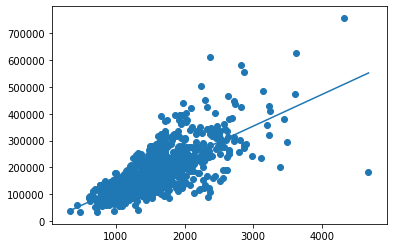

In [30]:
plot_regions(x_train,y_train,slr)

# 問題7 学習曲線のプロット

(5001,)


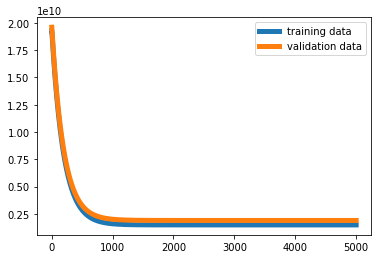

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
print(slr.cost.shape)
plt.plot(np.arange(1,len(slr.cost)+1),slr.cost,label='training data',
        linewidth=5)
plt.plot(np.arange(1,len(slr.val_cost)+1),slr.val_cost,label='validation data',
        linewidth=5)
plt.legend()

In [32]:
print(slr.cost)

[1.92568815e+10 1.92568815e+10 1.91652811e+10 ... 1.48657616e+09
 1.48657616e+09 1.48657616e+09]


# バイアス項の除去

In [33]:
nobias = False
slr_nobias = ScratchLinearRegression(n_iter,lr,nobias,verbose)
slr_nobias.fit(x_train.reshape(-1,1),y_train)
print(slr_nobias.cost)

[1.91976376e+10 1.91976376e+10 1.91063426e+10 ... 1.48657517e+09
 1.48657517e+09 1.48657517e+09]


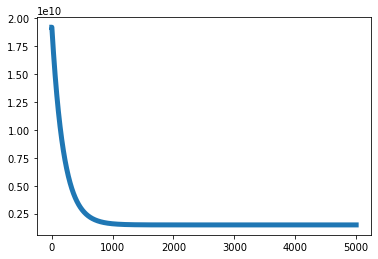

In [34]:
plt.plot(np.arange(1,len(slr_nobias.cost)+1),slr_nobias.cost,label='training data',
        linewidth=5)

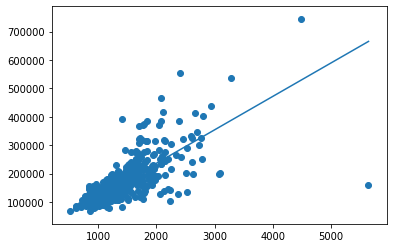

In [35]:
plot_regions(x_test,y_test,slr_nobias)

In [19]:
slr_nobias.thita.shape

(1,)

In [20]:
slr.thita.shape

(2,)

# 問題9 特徴量の多次元化

# 特徴量の2乗

In [36]:
x_train_power,x_test_power = x_train**2,x_test**2
lr_power = 0.000000000000001
slr_power=ScratchLinearRegression(n_iter,lr_power,bias,verbose)
slr_power.fit(x_train_power.reshape(-1,1),y_train,
              x_test_power.reshape(-1,1),y_test)

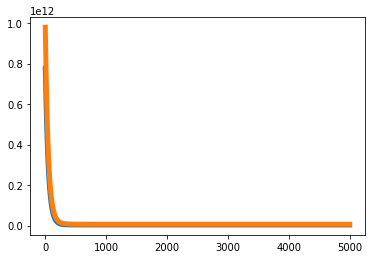

In [37]:
plt.plot(np.arange(1,len(slr_power.cost)+1),slr_power.cost,label='training data',
        linewidth=5)
plt.plot(np.arange(1,len(slr_power.val_cost)+1),slr_power.val_cost,label='test_data',
        linewidth=5)

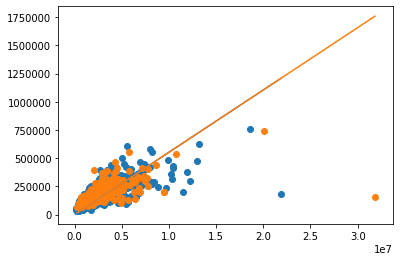

In [38]:
plot_regions(x_train_power,y_train,slr_power)
plot_regions(x_test_power,y_test,slr_power)

# 特徴量の3乗

In [39]:
x_train_power3,x_test_power3 = x_train**3,x_test**3
lr_power = 0.0000000000000000000001
slr_power3=ScratchLinearRegression(n_iter,lr_power,bias,verbose)
slr_power3.fit(x_train_power3.reshape(-1,1),y_train,
              x_test_power3.reshape(-1,1),y_test)


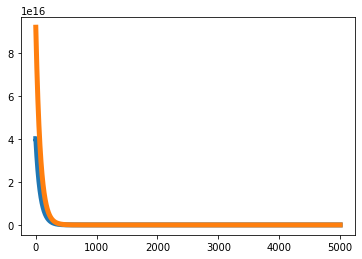

In [40]:
plt.plot(np.arange(1,len(slr_power3.cost)+1),slr_power3.cost,label='training data',
        linewidth=5)
plt.plot(np.arange(1,len(slr_power3.val_cost)+1),slr_power3.val_cost,label='test_data',
        linewidth=5)

# 問題10 更新式の導出

更新式、thita(j) = thita(j) - cost(thita)の偏微分から始める。<br>
cost(thita) = np.sum((h(x) - y)**2)のsumの中身を偏微分すると
h(x)-y=tとおくと、偏微分の連鎖律より、cost(thita)の微分=
cost(thita)のtによる微分*tのxjによる微分となり、結果
thita(j) = t * xj = (h(x) - y)*xjとなり、これをサンプル数で平均をとったものを更新式に代入すると更新式が導出される

# 問題11 局所最適解の問題

コスト関数の形状を考える。
xを定数、thitaを変数と考えると、コスト関数はthitaの式になる。
線形回帰の場合は、　hypothesis関数のthitaが1次の項であるため、
コスト関数はthitaの2次関数となる。2次関数の場合、極小値=最小値となるため、
学習を続けて発見した極小値＝最小値=最適解となる。
グラフで可視化してみるとわかりやすい。以下グラフ参照

In [112]:
thita0= np.linspace(1,200,100)
thita1=np.linspace(-100000,100000,100)
thita00,thita11 = np.meshgrid(thita0,thita1)
thita01 = np.array([thita00.ravel(),thita11.ravel()]).T
print(thita01.shape)
#cost = slr.mean_squared_error()

def mean_squared_error(thita,x,y):
        x = x.reshape(-1,1)
        print(x.shape,thita[:,:-1].T.shape)
        y_pred = np.dot(x,thita[:,:-1].T) + thita[:,-1]
        return np.sum((y_pred - y.reshape(-1,1))**2,axis=0) / (2*x.shape[0])
cost = mean_squared_error(thita01,x_train,y_train)

    

(10000, 2)
(1095, 1) (1, 10000)


Text(0.5, 0, 'thita1')

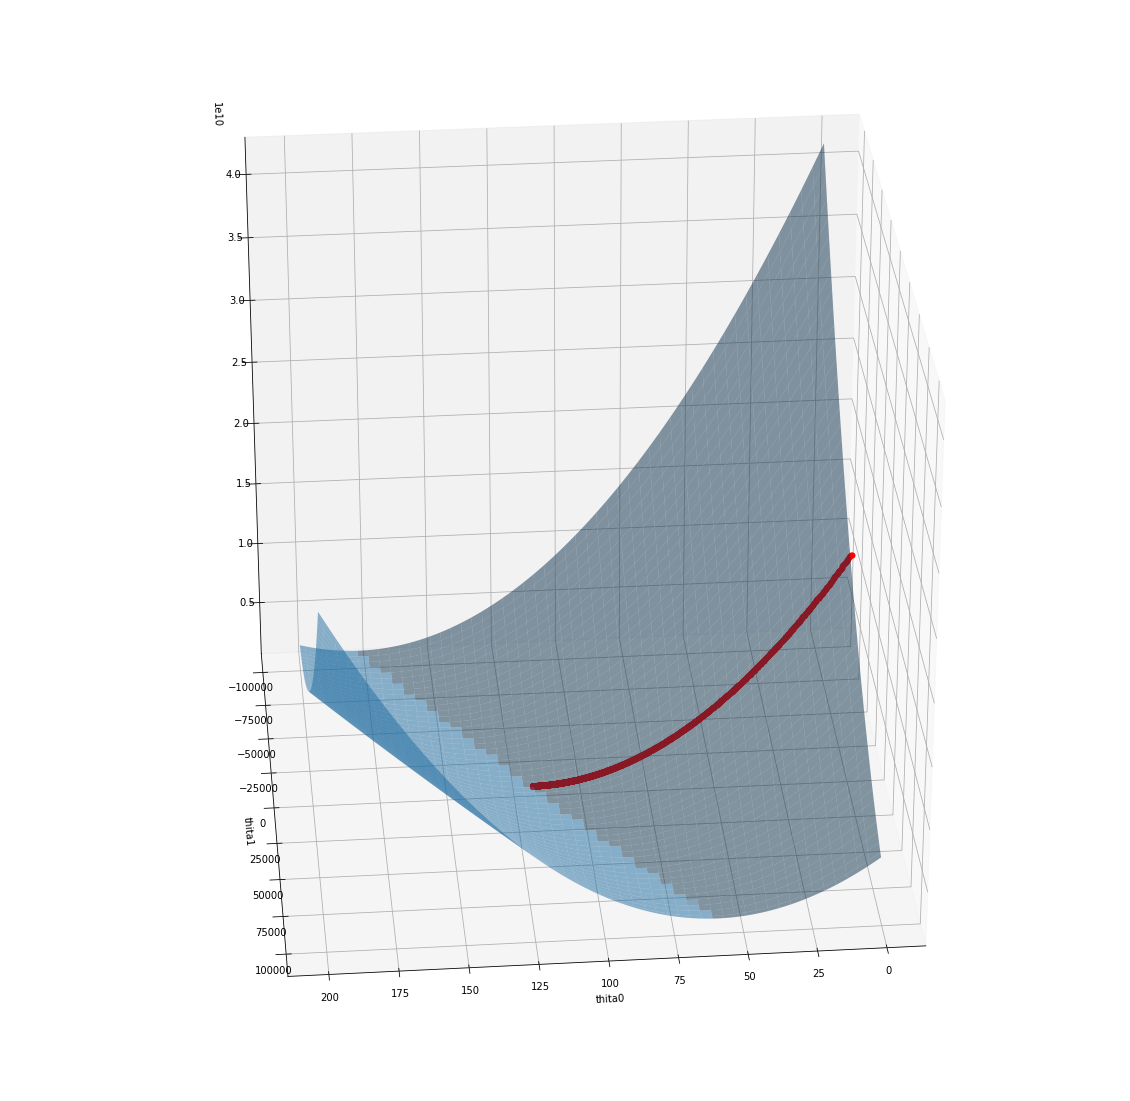

In [123]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(20,20))
axes = plt.subplot(1,1,1,projection='3d')
cost = cost.reshape(thita00.shape)
axes.plot_surface(thita00,thita11,cost,alpha=0.5)
axes.view_init(30,85)
axes.plot(slr.thita_list[:,0],slr.thita_list[:,1],slr.cost,linestyle='None',color='red',marker='o',markersize=5)
plt.xlabel('thita0')
plt.ylabel('thita1')

thita0軸及びthita1軸共に極小値が存在し、それが最小値になっているのがわかる。

In [83]:
print(slr.thita_list.shape)
print(slr.cost.shape)

(5000, 2)
(5000,)


In [98]:
print(slr.thita_list)

[[  0.5256589   -0.70102974]
 [  0.82868002  -0.7008498 ]
 [  1.13091915  -0.70067033]
 ...
 [117.94472724  -0.62522503]
 [117.94472799  -0.62522371]
 [117.94472874  -0.62522239]]


In [102]:
print(slr.thita_list[:,0].shape)

(5000,)
